#### Discrete Simulation HW6
#### Problem 1
Authored: Austin Jetrin Maddison 6481268

In [325]:
from my_settings import *

a.)

In [326]:
from sympy import symbols, Eq, solve

mem = {}
def calc_hitting_time_gambler(k, p, q, r, a, b):
    if not (a < k < b) :
        return 0.0

    if k in mem:
        return mem[k]

    eq = []
    k_ = lambda i : symbols(f'k{i}')

    # base cases for recurrence
    eq += [Eq(k_(a), 0)]
    eq += [Eq(k_(b), 0)]

    # solve recurrence
    for i in range(a+1, b):
        eq += [Eq(k_(i),  1 + p*k_(i+1) + r*k_(i) + q*k_(i-1))]

    res = solve(eq, symbols(f'k{a}:{b+1}'))

    # save results for later querying
    for key in res.keys():
        i = int(str(key)[1:])
        mem[i] = float(res[key])

    return mem[k]

b.)

In [327]:
a = 5
b = 15
h = np.vectorize(lambda k : calc_hitting_time_gambler(k=k, a=a, b=b, p=1/3, r=1/3, q=1/3))

ks = np.arange(a, b+1)
res_a = h(ks)
print(res_a)

[ 0.  13.5 24.  31.5 36.  37.5 36.  31.5 24.  13.5  0. ]


In [328]:
def GuessPoly(xs):
    if len(xs) < 2:
        raise ValueError("Sequence must contain at least two numbers.")

    def generate_equation(C, n, deg, A):
        eq = sum(C[i] * (n ** i) for i in range(deg + 1))
        return Eq(eq, A[n])

    deg = 1

    while deg <= len(xs) - 1:
        C = symbols(f'C0:{deg + 1}')
        equations = [generate_equation(C, n, deg, xs) for n in range(len(xs))]
        solution = solve(equations, C)

        if solution:
            return solution

        deg += 1

    return None

In [329]:
res_b = GuessPoly(res_a)
print(res_b)

{C0: 0.0, C1: 15.0000000000000, C2: -1.50000000000000}


c.)

Polynomial: -1.5*x**2 + 15.0*x


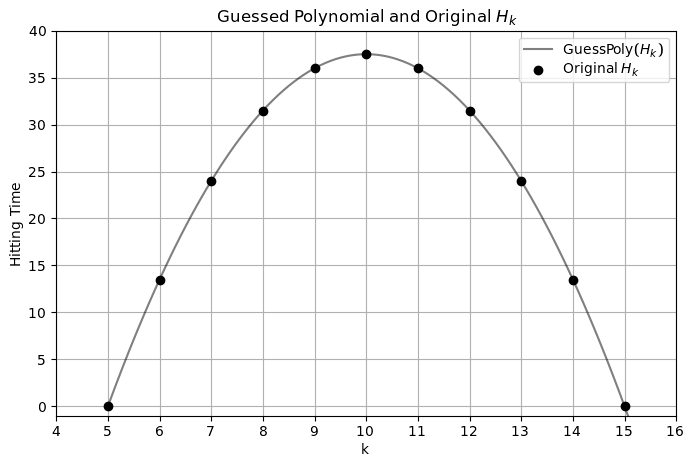

In [330]:
from sympy import lambdify

P = sum(res_b[c] * symbols('x')**i for i, c in enumerate(res_b))
poly_func = lambdify(symbols('x'), P, 'numpy')

print(f"Polynomial: {P}")

x_vals = np.arange(0, len(res_a), 0.1)
y_vals = poly_func(x_vals)

plt.figure(figsize=(8, 5))
plt.title("Guessed Polynomial and Original $H_k$")

plt.plot(x_vals + a, y_vals, label="$\\text{GuessPoly}(H_k)$", color="k", alpha=0.5)
plt.scatter(np.arange(len(res_a))+a, res_a, label="$\\text{Original }H_k$", color="k", zorder=5)
plt.xticks(np.arange(0, 100))
plt.xlim((a-1, b+1))
plt.ylim((-1, 40))
plt.xlabel("k")
plt.ylabel("Hitting Time")
plt.legend()
plt.grid()
plt.show()

